# UN-Supervised learning

# NLTK PYTHON LIBRARY

TEXTBOLB SENTIMENT ANALIZER

In [ ]:
from textblob import TextBlob
import pandas as pd

In [ ]:
from textblob import TextBlob
!cp '/content/drive/MyDrive/News_Dataset/Data/Preprocessing_Headlines/Preprocessed_Headline_UK_h.csv' .
India = pd.read_csv('Preprocessed_Headline_UK_h.csv')
def get_text_blob_sentiment(sentiment):
    polarity = TextBlob(sentiment).sentiment.polarity
    # The polarity score is a float within the range [-1.0, 1.0]. 
    textblob_sentiment = None
    if (polarity > 0):
        textblob_sentiment = '1'
    elif (polarity <= 0):
        textblob_sentiment = '0'
    return textblob_sentiment
India['text_blob_sentiment'] = India.apply(lambda row: get_text_blob_sentiment(row['Headline_Clean']), axis=1)

India.to_csv('UK_Headline_Original_Textblob.csv', index=False)

print(India)

       Unnamed: 0     Month                                     Date  \
0               0     April     Published:  06:04 BST, 16 April 2020   
1               1     April     Published:  01:42 BST, 16 April 2020   
2               2     April     Published:  01:41 BST, 16 April 2020   
3               3     April     Published:  01:40 BST, 16 April 2020   
4               4     April     Published:  01:40 BST, 16 April 2020   
...           ...       ...                                      ...   
23816       23816  November  Published:  22:58 GMT, 13 November 2020   
23817       23817  November  Published:  22:57 GMT, 13 November 2020   
23818       23818  November  Published:  22:53 GMT, 13 November 2020   
23819       23819  November  Published:  22:52 GMT, 13 November 2020   
23820       23820  November  Published:  22:33 GMT, 13 November 2020   

                                                Headline  \
0      PICTURED: Coronavirus patient is wheeled out o...   
1      Alan Jon

In [ ]:
India['text_blob_sentiment'].value_counts()

0    14253
1     9568
Name: text_blob_sentiment, dtype: int64

# SUPERVISED LEARNING 

In [ ]:
# line 17 nlp = spacy.load('en_core_web_sm') in text_normalizer.py
!wget "https://raw.githubusercontent.com/Aisha123ice/Suven-Sentiment-Project/main/text_normalizer.py"
!wget "https://raw.githubusercontent.com/Aisha123ice/Suven-Sentiment-Project/main/contractions.py"

--2022-10-13 05:56:58--  https://raw.githubusercontent.com/Aisha123ice/Suven-Sentiment-Project/main/text_normalizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3866 (3.8K) [text/plain]
Saving to: ‘text_normalizer.py’

text_normalizer.py  100%[===================>]   3.78K  --.-KB/s    in 0s      

2022-10-13 05:56:58 (54.8 MB/s) - ‘text_normalizer.py’ saved [3866/3866]

--2022-10-13 05:56:58--  https://raw.githubusercontent.com/Aisha123ice/Suven-Sentiment-Project/main/contractions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [ ]:
# !pip install spacy==1.0.1

In [ ]:
# !python -m spacy info

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
# nltk.download('stopwords')
import text_normalizer as tn
np.set_printoptions(precision=2, linewidth=80)

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Data/Sentiment Analysis/All_Label_Covid_Headlines.csv')

# take a peek at the data
dataset.head()

,Month,Date,Headline_Original,Sentiment,Headline_Clean
0,April,"Updated: Apr 17, 2020 15:28 IST","Rs 500 notes lay on Delhi street, no one touch...",0,rs note lay delhi street no one touch due coro...
1,April,"Updated: Apr 17, 2020 14:19 IST",Charu Asopa on trolls attacking her over pics ...,0,charu asopa troll attack pics husband keep thi...
2,April,"Updated: Apr 17, 2020 13:54 IST",People abandoning their pets are cruel and ign...,0,people abandon pet cruel ignorant richa
3,April,"Updated: Apr 17, 2020 12:42 IST",Indian women's hockey team to raise funds for ...,0,indian women hockey team raise fund poor affec...
4,April,"Updated: Apr 17, 2020 12:42 IST",Real estate sector faces serious setback due t...,0,real estate sector face serious setback due re...


In [ ]:
dataset.shape

(10727, 5)

In [ ]:
new_dataset = pd.read_csv('/content/drive/MyDrive/News_Dataset/Data/Sentiment Analysis/Headline_UK.csv')
test_headline = new_dataset['Headline_Clean']

In [ ]:
test_headline

0        pictured coronavirus patient wheel comfort inn...
1        alan jones ridicule chinese newspaper harshly ...
2        australia lead say country not need fearful co...
3        crown resorts stand employees company struggle...
4        book flight lockdown lift plane ticket much ch...
                               ...                        
23816    screw mess billionaire charles koch say regret...
23817    nurses let care home without coronavirus test ...
23818    anatomy maine super spreader wed california co...
23819    care home prove test works residents one home ...
23820    oregon governor issue strictest lockdown measu...
Name: Headline_Clean, Length: 23821, dtype: object

In [ ]:
# checking for null values
dataset.isna().sum()

Month                0
Date                 0
Headline_Original    0
Sentiment            0
Headline_Clean       0
dtype: int64

In [ ]:
# info of our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10727 entries, 0 to 10726
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              10727 non-null  object
 1   Date               10727 non-null  object
 2   Headline_Original  10727 non-null  object
 3   Sentiment          10727 non-null  int64 
 4   Headline_Clean     10727 non-null  object
dtypes: int64(1), object(4)
memory usage: 419.1+ KB


In [ ]:
dataset = dataset.sample(frac = 1)

In [ ]:
dataset

,Month,Date,Headline_Original,Sentiment,Headline_Clean
5047,August,"Published: 18:05 BST, 18 August 2020",World is NOWHERE near reaching herd immunity a...,0,world nowhere near reach herd immunity coronav...
763,June,"Updated: Jun 04, 2020 13:44 IST","West Bengal: Amid lack of transport options, C...",0,west bengal amid lack transport options cm mam...
5043,August,"Published: 13:10 BST, 20 August 2020",Alarming photos of blood-stained bed sheets an...,0,alarming photos bed sheet use face mask inside...
7412,August,"August 4, 2020","Baseball: Ino, Kamizato lead BayStars in win o...",1,baseball ino kamizato lead baystars win dragons
661,May,"Updated: May 18, 2020 23:26 IST",Ashish Chowdhry on Covid-19 crisis: Our family...,0,ashish chowdhry crisis family victims terror a...
...,...,...,...,...,...
3207,July,"Published: 20:42 BST, 12 July 2020","Wisconsin congressman Glenn Grothman, 65, is l...",0,wisconsin congressman glenn grothman leave lit...
5429,April,"Updated: Apr 08, 2020 18:27 IST",Man Utd must be ready for return to ‘normality...,1,man utd must ready return normality say solskjaer
1709,June,"Jun 20, 2020",Chinese vaccine may not be ready for sale unti...,0,chinese vaccine may not ready sale least
3083,August,"Published: 18:24 BST, 26 August 2020","Gunman, 17, is charged with first degree inten...",0,gunman charge first degree intentional homicid...


In [ ]:
# Encoding Sentiment column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["Sentiment"] = le.fit_transform(dataset["Sentiment"])
dataset.head()

,Month,Date,Headline_Original,Sentiment,Headline_Clean
5047,August,"Published: 18:05 BST, 18 August 2020",World is NOWHERE near reaching herd immunity a...,0,world nowhere near reach herd immunity coronav...
763,June,"Updated: Jun 04, 2020 13:44 IST","West Bengal: Amid lack of transport options, C...",0,west bengal amid lack transport options cm mam...
5043,August,"Published: 13:10 BST, 20 August 2020",Alarming photos of blood-stained bed sheets an...,0,alarming photos bed sheet use face mask inside...
7412,August,"August 4, 2020","Baseball: Ino, Kamizato lead BayStars in win o...",1,baseball ino kamizato lead baystars win dragons
661,May,"Updated: May 18, 2020 23:26 IST",Ashish Chowdhry on Covid-19 crisis: Our family...,0,ashish chowdhry crisis family victims terror a...


In [ ]:
headlines = np.array(dataset['Headline_Clean'])
sentiments = np.array(dataset['Sentiment'])

# build train and test datasets
train_headlines = headlines[:9118]
train_headlines = sentiments[:9118]
test_headlines = headlines[9118:]
test_headlines = sentiments[9118:]

# normalize datasets
norm_train_headlines = tn.normalize_corpus(train_headlines)
norm_test_headlines = tn.normalize_corpus(test_headlines)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_headlines)

# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_headlines)

In [ ]:
# transform test reviews into features 
cv_test_features = cv.transform(norm_test_headlines)
tv_test_features = tv.transform(norm_test_headlines)

In [ ]:

print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (9118, 81247)  Test features shape: (1609, 81247)
TFIDF model:> Train features shape: (9118, 81247)  Test features shape: (1609, 81247)


In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

# LR-BOW MODEL Features

In [ ]:
# Logistic Regression model on BOW features
lr.fit(cv_train_features,train_sentiments)
# predict using model
predictions = lr.predict(cv_test_features) 

In [ ]:

score = lr.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 92.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 92.0%')

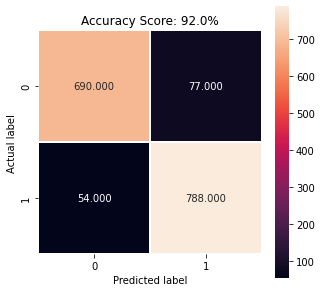

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [ ]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       767
           1       0.91      0.94      0.92       842

    accuracy                           0.92      1609
   macro avg       0.92      0.92      0.92      1609
weighted avg       0.92      0.92      0.92      1609



In [ ]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))  

Accuracy:  91.86% 
Precision: 91.88% 
Recall:    91.86% 
F1 Score:  91.85% 


# LR-TFIDF Features

In [ ]:
# Logistic Regression model on BOW features
lr.fit(tv_train_features,train_sentiments)
# predict using model
predictions = lr.predict(tv_test_features) 

In [ ]:
score = lr.score(tv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 91.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 91.0%')

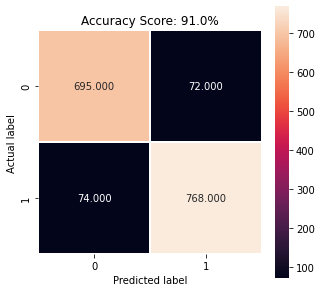

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [ ]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       767
           1       0.91      0.91      0.91       842

    accuracy                           0.91      1609
   macro avg       0.91      0.91      0.91      1609
weighted avg       0.91      0.91      0.91      1609



In [ ]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))                       

Accuracy:  90.93% 
Precision: 90.93% 
Recall:    90.93% 
F1 Score:  90.93% 


# SVM -BOW Features

In [ ]:
# SVM model on BOW features
svm.fit(cv_train_features,train_sentiments)
# predict using model
predictions = svm.predict(cv_test_features)

In [ ]:
score = svm.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 92.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 92.0%')

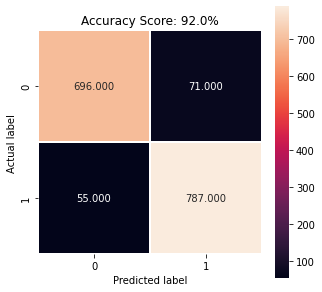

In [ ]:
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [ ]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       767
           1       0.92      0.93      0.93       842

    accuracy                           0.92      1609
   macro avg       0.92      0.92      0.92      1609
weighted avg       0.92      0.92      0.92      1609



In [ ]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))      

Accuracy:  92.17% 
Precision: 92.18% 
Recall:    92.17% 
F1 Score:  92.16% 


# SVM - TFIDF Features

In [ ]:
# SVM model on TF-IDF features
svm.fit(tv_train_features,train_sentiments)
# predict using model
predictions = svm.predict(tv_test_features) 

In [ ]:
score = svm.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 91.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 91.0%')

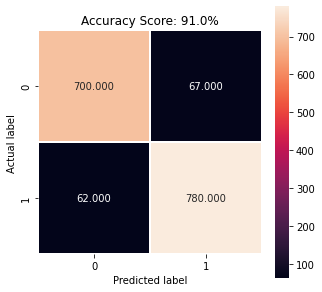

In [ ]:
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [ ]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       767
           1       0.92      0.93      0.92       842

    accuracy                           0.92      1609
   macro avg       0.92      0.92      0.92      1609
weighted avg       0.92      0.92      0.92      1609



In [ ]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))

Accuracy:  91.98% 
Precision: 91.98% 
Recall:    91.98% 
F1 Score:  91.98% 
